In [12]:


import torch
import numpy as np
%load_ext autoreload
%autoreload 2
import pinot
import math
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
# define the target
f = lambda x: torch.sin(x)

x_tr = torch.tensor(np.concatenate(
    [
        np.linspace(-3 * math.pi, -math.pi, 50),
        np.linspace(math.pi, 3 * math.pi, 50)
    ]),
    dtype=torch.float32)[:, None]

x_te = torch.tensor(np.concatenate(
    [
        np.linspace(-7 * math.pi, -3 * math.pi, 100),
        np.linspace(-math.pi, math.pi, 50),
        np.linspace(3 * math.pi, 7 * math.pi, 100)
    ]),
    dtype=torch.float32)[:, None]

x = torch.tensor(np.linspace(-7 * math.pi, 7 * math.pi, 375),
                 dtype=torch.float32)[:, None]


y_tr = f(x_tr)
y_te = f(x_te)
y = f(x)

In [14]:
net = torch.nn.Sequential(
        torch.nn.Linear(1, 50),
        torch.nn.Tanh(),
        torch.nn.Linear(50, 1))

base_kernel=pinot.inference.gp.kernels.rbf.RBF()

kernel = pinot.inference.gp.kernels.deep_kernel.DeepKernel(
    net,
    base_kernel=base_kernel)

gpr = pinot.inference.gp.gpr.variational_gpr.VGPR(kernel, n_tr=x_tr.shape[0])

In [22]:
# opt = torch.optim.Adam(gpr.parameters(), 1e-2)
for _ in range(5000):
    opt.zero_grad()
    loss = gpr.loss(x_tr, y_tr).sum()
    loss.backward()
    print(loss)
    opt.step()

/Users/wangy1/Documents/GitHub/pinot/pinot/inference/gp/gpr/variational_gpr.py:45: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  torch.exp(self.sigma_diag)).masked_scatter(
/Users/wangy1/Documents/GitHub/pinot/pinot/inference/gp/gpr/variational_gpr.py:46: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  torch.gt(


tensor(179.2896, grad_fn=<SumBackward0>)
tensor(182.8781, grad_fn=<SumBackward0>)
tensor(183.9810, grad_fn=<SumBackward0>)
tensor(177.8804, grad_fn=<SumBackward0>)
tensor(177.3429, grad_fn=<SumBackward0>)
tensor(177.4301, grad_fn=<SumBackward0>)
tensor(176.3434, grad_fn=<SumBackward0>)
tensor(180.1984, grad_fn=<SumBackward0>)
tensor(177.8870, grad_fn=<SumBackward0>)
tensor(184.2523, grad_fn=<SumBackward0>)
tensor(180.0068, grad_fn=<SumBackward0>)
tensor(180.5476, grad_fn=<SumBackward0>)
tensor(181.0738, grad_fn=<SumBackward0>)
tensor(176.9033, grad_fn=<SumBackward0>)
tensor(183.5273, grad_fn=<SumBackward0>)
tensor(181.7424, grad_fn=<SumBackward0>)
tensor(178.1181, grad_fn=<SumBackward0>)
tensor(177.7291, grad_fn=<SumBackward0>)
tensor(176.9329, grad_fn=<SumBackward0>)
tensor(178.2321, grad_fn=<SumBackward0>)
tensor(174.3545, grad_fn=<SumBackward0>)
tensor(177.8072, grad_fn=<SumBackward0>)
tensor(175.5094, grad_fn=<SumBackward0>)
tensor(174.4456, grad_fn=<SumBackward0>)
tensor(179.4161,

tensor(176.0038, grad_fn=<SumBackward0>)
tensor(176.2192, grad_fn=<SumBackward0>)
tensor(177.2491, grad_fn=<SumBackward0>)
tensor(184.7502, grad_fn=<SumBackward0>)
tensor(177.6771, grad_fn=<SumBackward0>)
tensor(178.2527, grad_fn=<SumBackward0>)
tensor(184.9447, grad_fn=<SumBackward0>)
tensor(176.6700, grad_fn=<SumBackward0>)
tensor(172.4016, grad_fn=<SumBackward0>)
tensor(181.0899, grad_fn=<SumBackward0>)
tensor(177.1766, grad_fn=<SumBackward0>)
tensor(171.6721, grad_fn=<SumBackward0>)
tensor(180.0992, grad_fn=<SumBackward0>)
tensor(179.3886, grad_fn=<SumBackward0>)
tensor(175.2538, grad_fn=<SumBackward0>)
tensor(178.6715, grad_fn=<SumBackward0>)
tensor(180.7998, grad_fn=<SumBackward0>)
tensor(174.5363, grad_fn=<SumBackward0>)
tensor(178.3576, grad_fn=<SumBackward0>)
tensor(178.0886, grad_fn=<SumBackward0>)
tensor(174.6078, grad_fn=<SumBackward0>)
tensor(169.8600, grad_fn=<SumBackward0>)
tensor(181.3568, grad_fn=<SumBackward0>)
tensor(174.4443, grad_fn=<SumBackward0>)
tensor(176.5634,

tensor(178.9247, grad_fn=<SumBackward0>)
tensor(173.3823, grad_fn=<SumBackward0>)
tensor(175.7278, grad_fn=<SumBackward0>)
tensor(173.2467, grad_fn=<SumBackward0>)
tensor(175.2505, grad_fn=<SumBackward0>)
tensor(175.8548, grad_fn=<SumBackward0>)
tensor(172.5345, grad_fn=<SumBackward0>)
tensor(173.9926, grad_fn=<SumBackward0>)
tensor(174.7592, grad_fn=<SumBackward0>)
tensor(172.7960, grad_fn=<SumBackward0>)
tensor(172.2861, grad_fn=<SumBackward0>)
tensor(174.3295, grad_fn=<SumBackward0>)
tensor(175.7314, grad_fn=<SumBackward0>)
tensor(172.6794, grad_fn=<SumBackward0>)
tensor(174.0435, grad_fn=<SumBackward0>)
tensor(175.9694, grad_fn=<SumBackward0>)
tensor(173.3230, grad_fn=<SumBackward0>)
tensor(172.9378, grad_fn=<SumBackward0>)
tensor(181.4425, grad_fn=<SumBackward0>)
tensor(171.5336, grad_fn=<SumBackward0>)
tensor(173.4686, grad_fn=<SumBackward0>)
tensor(181.6472, grad_fn=<SumBackward0>)
tensor(170.0178, grad_fn=<SumBackward0>)
tensor(173.0795, grad_fn=<SumBackward0>)
tensor(179.0282,

tensor(173.1059, grad_fn=<SumBackward0>)
tensor(180.6923, grad_fn=<SumBackward0>)
tensor(173.0872, grad_fn=<SumBackward0>)
tensor(169.3563, grad_fn=<SumBackward0>)
tensor(175.2191, grad_fn=<SumBackward0>)
tensor(173.0947, grad_fn=<SumBackward0>)
tensor(173.3029, grad_fn=<SumBackward0>)
tensor(184.4340, grad_fn=<SumBackward0>)
tensor(172.3248, grad_fn=<SumBackward0>)
tensor(173.3029, grad_fn=<SumBackward0>)
tensor(181.5549, grad_fn=<SumBackward0>)
tensor(170.5707, grad_fn=<SumBackward0>)
tensor(179.4058, grad_fn=<SumBackward0>)
tensor(170.9147, grad_fn=<SumBackward0>)
tensor(178.0923, grad_fn=<SumBackward0>)
tensor(173.5025, grad_fn=<SumBackward0>)
tensor(172.4554, grad_fn=<SumBackward0>)
tensor(172.2031, grad_fn=<SumBackward0>)
tensor(176.3569, grad_fn=<SumBackward0>)
tensor(170.8456, grad_fn=<SumBackward0>)
tensor(170.5841, grad_fn=<SumBackward0>)
tensor(173.8629, grad_fn=<SumBackward0>)
tensor(168.8286, grad_fn=<SumBackward0>)
tensor(170.2085, grad_fn=<SumBackward0>)
tensor(173.1357,

tensor(174.4165, grad_fn=<SumBackward0>)
tensor(169.2042, grad_fn=<SumBackward0>)
tensor(168.1058, grad_fn=<SumBackward0>)
tensor(169.8709, grad_fn=<SumBackward0>)
tensor(168.9421, grad_fn=<SumBackward0>)
tensor(174.4308, grad_fn=<SumBackward0>)
tensor(168.9454, grad_fn=<SumBackward0>)
tensor(168.7923, grad_fn=<SumBackward0>)
tensor(172.8624, grad_fn=<SumBackward0>)
tensor(177.2204, grad_fn=<SumBackward0>)
tensor(179.3075, grad_fn=<SumBackward0>)
tensor(174.7062, grad_fn=<SumBackward0>)
tensor(169.8534, grad_fn=<SumBackward0>)
tensor(169.9969, grad_fn=<SumBackward0>)
tensor(168.3464, grad_fn=<SumBackward0>)
tensor(172.4289, grad_fn=<SumBackward0>)
tensor(177.4144, grad_fn=<SumBackward0>)
tensor(172.9974, grad_fn=<SumBackward0>)
tensor(172.5446, grad_fn=<SumBackward0>)
tensor(170.9838, grad_fn=<SumBackward0>)
tensor(173.9031, grad_fn=<SumBackward0>)
tensor(172.4455, grad_fn=<SumBackward0>)
tensor(166.9541, grad_fn=<SumBackward0>)
tensor(171.9280, grad_fn=<SumBackward0>)
tensor(168.9643,

tensor(171.6023, grad_fn=<SumBackward0>)
tensor(171.5288, grad_fn=<SumBackward0>)
tensor(167.5345, grad_fn=<SumBackward0>)
tensor(169.3244, grad_fn=<SumBackward0>)
tensor(173.2578, grad_fn=<SumBackward0>)
tensor(167.2546, grad_fn=<SumBackward0>)
tensor(170.7912, grad_fn=<SumBackward0>)
tensor(167.0224, grad_fn=<SumBackward0>)
tensor(171.1192, grad_fn=<SumBackward0>)
tensor(169.6409, grad_fn=<SumBackward0>)
tensor(174.3688, grad_fn=<SumBackward0>)
tensor(169.0592, grad_fn=<SumBackward0>)
tensor(173.0261, grad_fn=<SumBackward0>)
tensor(169.1309, grad_fn=<SumBackward0>)
tensor(168.8942, grad_fn=<SumBackward0>)
tensor(167.8989, grad_fn=<SumBackward0>)
tensor(167.3105, grad_fn=<SumBackward0>)
tensor(173.2227, grad_fn=<SumBackward0>)
tensor(167.8845, grad_fn=<SumBackward0>)
tensor(166.0471, grad_fn=<SumBackward0>)
tensor(169.8315, grad_fn=<SumBackward0>)
tensor(173.4199, grad_fn=<SumBackward0>)
tensor(170.1853, grad_fn=<SumBackward0>)
tensor(170.4060, grad_fn=<SumBackward0>)
tensor(167.3046,

tensor(167.7153, grad_fn=<SumBackward0>)
tensor(168.6243, grad_fn=<SumBackward0>)
tensor(165.4668, grad_fn=<SumBackward0>)
tensor(167.5681, grad_fn=<SumBackward0>)
tensor(169.6961, grad_fn=<SumBackward0>)
tensor(167.7809, grad_fn=<SumBackward0>)
tensor(165.5111, grad_fn=<SumBackward0>)
tensor(170.2916, grad_fn=<SumBackward0>)
tensor(164.8686, grad_fn=<SumBackward0>)
tensor(170.3621, grad_fn=<SumBackward0>)
tensor(169.0351, grad_fn=<SumBackward0>)
tensor(170.3513, grad_fn=<SumBackward0>)
tensor(174.0518, grad_fn=<SumBackward0>)
tensor(166.2513, grad_fn=<SumBackward0>)
tensor(169.0109, grad_fn=<SumBackward0>)
tensor(169.7476, grad_fn=<SumBackward0>)
tensor(169.0870, grad_fn=<SumBackward0>)
tensor(169.2883, grad_fn=<SumBackward0>)
tensor(169.2543, grad_fn=<SumBackward0>)
tensor(165.9390, grad_fn=<SumBackward0>)
tensor(171.3101, grad_fn=<SumBackward0>)
tensor(173.7065, grad_fn=<SumBackward0>)
tensor(172.7635, grad_fn=<SumBackward0>)
tensor(174.1069, grad_fn=<SumBackward0>)
tensor(175.2190,

tensor(163.5488, grad_fn=<SumBackward0>)
tensor(172.6702, grad_fn=<SumBackward0>)
tensor(170.3246, grad_fn=<SumBackward0>)
tensor(170.8195, grad_fn=<SumBackward0>)
tensor(168.9530, grad_fn=<SumBackward0>)
tensor(171.0772, grad_fn=<SumBackward0>)
tensor(172.4981, grad_fn=<SumBackward0>)
tensor(165.6993, grad_fn=<SumBackward0>)
tensor(172.4339, grad_fn=<SumBackward0>)
tensor(168.9092, grad_fn=<SumBackward0>)
tensor(174.8801, grad_fn=<SumBackward0>)
tensor(171.6325, grad_fn=<SumBackward0>)
tensor(164.8721, grad_fn=<SumBackward0>)
tensor(164.6697, grad_fn=<SumBackward0>)
tensor(166.9345, grad_fn=<SumBackward0>)
tensor(165.7236, grad_fn=<SumBackward0>)
tensor(170.7544, grad_fn=<SumBackward0>)
tensor(167.9574, grad_fn=<SumBackward0>)
tensor(171.7211, grad_fn=<SumBackward0>)
tensor(162.8854, grad_fn=<SumBackward0>)
tensor(167.0869, grad_fn=<SumBackward0>)
tensor(166.7361, grad_fn=<SumBackward0>)
tensor(177.0105, grad_fn=<SumBackward0>)
tensor(164.2032, grad_fn=<SumBackward0>)
tensor(165.3260,

tensor(166.7502, grad_fn=<SumBackward0>)
tensor(168.6076, grad_fn=<SumBackward0>)
tensor(178.1904, grad_fn=<SumBackward0>)
tensor(163.7426, grad_fn=<SumBackward0>)
tensor(169.3906, grad_fn=<SumBackward0>)
tensor(164.4022, grad_fn=<SumBackward0>)
tensor(167.3947, grad_fn=<SumBackward0>)
tensor(166.5680, grad_fn=<SumBackward0>)
tensor(168.9564, grad_fn=<SumBackward0>)
tensor(169.7404, grad_fn=<SumBackward0>)
tensor(165.7419, grad_fn=<SumBackward0>)
tensor(167.8571, grad_fn=<SumBackward0>)
tensor(170.9929, grad_fn=<SumBackward0>)
tensor(163.7554, grad_fn=<SumBackward0>)
tensor(167.3491, grad_fn=<SumBackward0>)
tensor(170.6999, grad_fn=<SumBackward0>)
tensor(166.6837, grad_fn=<SumBackward0>)
tensor(169.3202, grad_fn=<SumBackward0>)
tensor(166.0284, grad_fn=<SumBackward0>)
tensor(166.6900, grad_fn=<SumBackward0>)
tensor(168.8807, grad_fn=<SumBackward0>)
tensor(164.1317, grad_fn=<SumBackward0>)
tensor(169.0623, grad_fn=<SumBackward0>)
tensor(165.0225, grad_fn=<SumBackward0>)
tensor(168.5127,

tensor(164.0553, grad_fn=<SumBackward0>)
tensor(168.4541, grad_fn=<SumBackward0>)
tensor(169.7275, grad_fn=<SumBackward0>)
tensor(167.2778, grad_fn=<SumBackward0>)
tensor(166.7599, grad_fn=<SumBackward0>)
tensor(167.4642, grad_fn=<SumBackward0>)
tensor(176.3394, grad_fn=<SumBackward0>)
tensor(166.8969, grad_fn=<SumBackward0>)
tensor(172.7730, grad_fn=<SumBackward0>)
tensor(164.2938, grad_fn=<SumBackward0>)
tensor(166.7330, grad_fn=<SumBackward0>)
tensor(172.7863, grad_fn=<SumBackward0>)
tensor(170.6362, grad_fn=<SumBackward0>)
tensor(164.6124, grad_fn=<SumBackward0>)
tensor(164.0361, grad_fn=<SumBackward0>)
tensor(166.6629, grad_fn=<SumBackward0>)
tensor(166.8413, grad_fn=<SumBackward0>)
tensor(167.5793, grad_fn=<SumBackward0>)
tensor(164.3845, grad_fn=<SumBackward0>)
tensor(165.6952, grad_fn=<SumBackward0>)
tensor(170.6326, grad_fn=<SumBackward0>)
tensor(165.3642, grad_fn=<SumBackward0>)
tensor(172.4056, grad_fn=<SumBackward0>)
tensor(171.3650, grad_fn=<SumBackward0>)
tensor(166.6551,

tensor(168.4257, grad_fn=<SumBackward0>)
tensor(165.1255, grad_fn=<SumBackward0>)
tensor(166.2852, grad_fn=<SumBackward0>)
tensor(171.7983, grad_fn=<SumBackward0>)
tensor(165.0289, grad_fn=<SumBackward0>)
tensor(161.7712, grad_fn=<SumBackward0>)
tensor(164.8107, grad_fn=<SumBackward0>)
tensor(166.4932, grad_fn=<SumBackward0>)
tensor(163.5675, grad_fn=<SumBackward0>)
tensor(165.3130, grad_fn=<SumBackward0>)
tensor(167.2296, grad_fn=<SumBackward0>)
tensor(164.4363, grad_fn=<SumBackward0>)
tensor(165.0074, grad_fn=<SumBackward0>)
tensor(164.9654, grad_fn=<SumBackward0>)
tensor(164.0224, grad_fn=<SumBackward0>)
tensor(165.7188, grad_fn=<SumBackward0>)
tensor(166.9259, grad_fn=<SumBackward0>)
tensor(165.7896, grad_fn=<SumBackward0>)
tensor(171.9449, grad_fn=<SumBackward0>)
tensor(166.0542, grad_fn=<SumBackward0>)
tensor(168.1525, grad_fn=<SumBackward0>)
tensor(163.9765, grad_fn=<SumBackward0>)
tensor(162.8001, grad_fn=<SumBackward0>)
tensor(165.5467, grad_fn=<SumBackward0>)
tensor(169.4709,

tensor(169.1991, grad_fn=<SumBackward0>)
tensor(164.6692, grad_fn=<SumBackward0>)
tensor(174.2477, grad_fn=<SumBackward0>)
tensor(168.4194, grad_fn=<SumBackward0>)
tensor(168.5648, grad_fn=<SumBackward0>)
tensor(166.9206, grad_fn=<SumBackward0>)
tensor(167.4447, grad_fn=<SumBackward0>)
tensor(169.7847, grad_fn=<SumBackward0>)
tensor(165.8806, grad_fn=<SumBackward0>)
tensor(164.2109, grad_fn=<SumBackward0>)
tensor(164.8036, grad_fn=<SumBackward0>)
tensor(165.3815, grad_fn=<SumBackward0>)
tensor(161.6692, grad_fn=<SumBackward0>)
tensor(160.8718, grad_fn=<SumBackward0>)
tensor(166.9387, grad_fn=<SumBackward0>)
tensor(164.6690, grad_fn=<SumBackward0>)
tensor(162.3374, grad_fn=<SumBackward0>)
tensor(167.3928, grad_fn=<SumBackward0>)
tensor(166.1333, grad_fn=<SumBackward0>)
tensor(163.0622, grad_fn=<SumBackward0>)
tensor(168.1937, grad_fn=<SumBackward0>)
tensor(163.6120, grad_fn=<SumBackward0>)
tensor(160.9936, grad_fn=<SumBackward0>)
tensor(166.9195, grad_fn=<SumBackward0>)
tensor(167.7538,

tensor(164.3564, grad_fn=<SumBackward0>)
tensor(162.7143, grad_fn=<SumBackward0>)
tensor(163.4417, grad_fn=<SumBackward0>)
tensor(167.7511, grad_fn=<SumBackward0>)
tensor(166.0231, grad_fn=<SumBackward0>)
tensor(163.4495, grad_fn=<SumBackward0>)
tensor(166.3598, grad_fn=<SumBackward0>)
tensor(163.1093, grad_fn=<SumBackward0>)
tensor(163.5951, grad_fn=<SumBackward0>)
tensor(171.3810, grad_fn=<SumBackward0>)
tensor(163.2687, grad_fn=<SumBackward0>)
tensor(160.9039, grad_fn=<SumBackward0>)
tensor(165.9318, grad_fn=<SumBackward0>)
tensor(164.7721, grad_fn=<SumBackward0>)
tensor(164.3355, grad_fn=<SumBackward0>)
tensor(159.9879, grad_fn=<SumBackward0>)
tensor(160.8859, grad_fn=<SumBackward0>)
tensor(164.6428, grad_fn=<SumBackward0>)
tensor(165.6935, grad_fn=<SumBackward0>)
tensor(164.8154, grad_fn=<SumBackward0>)
tensor(166.5082, grad_fn=<SumBackward0>)
tensor(163.7087, grad_fn=<SumBackward0>)
tensor(165.9358, grad_fn=<SumBackward0>)
tensor(163.3498, grad_fn=<SumBackward0>)
tensor(162.7068,

tensor(165.6564, grad_fn=<SumBackward0>)
tensor(165.6564, grad_fn=<SumBackward0>)
tensor(163.3233, grad_fn=<SumBackward0>)
tensor(164.3389, grad_fn=<SumBackward0>)
tensor(165.4748, grad_fn=<SumBackward0>)
tensor(168.7374, grad_fn=<SumBackward0>)
tensor(169.1344, grad_fn=<SumBackward0>)
tensor(162.9340, grad_fn=<SumBackward0>)
tensor(162.5169, grad_fn=<SumBackward0>)
tensor(165.5984, grad_fn=<SumBackward0>)
tensor(166.1983, grad_fn=<SumBackward0>)
tensor(166.3049, grad_fn=<SumBackward0>)
tensor(159.8598, grad_fn=<SumBackward0>)
tensor(163.9164, grad_fn=<SumBackward0>)
tensor(162.1921, grad_fn=<SumBackward0>)
tensor(163.0617, grad_fn=<SumBackward0>)
tensor(163.8435, grad_fn=<SumBackward0>)
tensor(166.4152, grad_fn=<SumBackward0>)
tensor(160.7059, grad_fn=<SumBackward0>)
tensor(168.6661, grad_fn=<SumBackward0>)
tensor(164.2449, grad_fn=<SumBackward0>)
tensor(166.1998, grad_fn=<SumBackward0>)
tensor(159.8437, grad_fn=<SumBackward0>)
tensor(168.1364, grad_fn=<SumBackward0>)
tensor(168.8073,

tensor(166.7956, grad_fn=<SumBackward0>)
tensor(165.9913, grad_fn=<SumBackward0>)
tensor(161.5046, grad_fn=<SumBackward0>)
tensor(164.8505, grad_fn=<SumBackward0>)
tensor(159.7196, grad_fn=<SumBackward0>)
tensor(164.1827, grad_fn=<SumBackward0>)
tensor(162.6736, grad_fn=<SumBackward0>)
tensor(167.4784, grad_fn=<SumBackward0>)
tensor(160.3030, grad_fn=<SumBackward0>)
tensor(158.3885, grad_fn=<SumBackward0>)
tensor(167.6393, grad_fn=<SumBackward0>)
tensor(160.8900, grad_fn=<SumBackward0>)
tensor(164.4186, grad_fn=<SumBackward0>)
tensor(162.1604, grad_fn=<SumBackward0>)
tensor(164.1361, grad_fn=<SumBackward0>)
tensor(163.5950, grad_fn=<SumBackward0>)
tensor(172.4019, grad_fn=<SumBackward0>)
tensor(168.2024, grad_fn=<SumBackward0>)
tensor(163.2653, grad_fn=<SumBackward0>)
tensor(160.2741, grad_fn=<SumBackward0>)
tensor(163.4844, grad_fn=<SumBackward0>)
tensor(173.5251, grad_fn=<SumBackward0>)
tensor(169.2547, grad_fn=<SumBackward0>)
tensor(163.7425, grad_fn=<SumBackward0>)
tensor(161.7624,

tensor(163.5894, grad_fn=<SumBackward0>)
tensor(166.1257, grad_fn=<SumBackward0>)
tensor(164.0721, grad_fn=<SumBackward0>)
tensor(165.7542, grad_fn=<SumBackward0>)
tensor(161.3902, grad_fn=<SumBackward0>)
tensor(166.1655, grad_fn=<SumBackward0>)
tensor(160.9802, grad_fn=<SumBackward0>)
tensor(166.5877, grad_fn=<SumBackward0>)
tensor(171.2476, grad_fn=<SumBackward0>)
tensor(170.2111, grad_fn=<SumBackward0>)
tensor(165.1096, grad_fn=<SumBackward0>)
tensor(160.4937, grad_fn=<SumBackward0>)
tensor(168.6860, grad_fn=<SumBackward0>)
tensor(170.4832, grad_fn=<SumBackward0>)
tensor(162.3960, grad_fn=<SumBackward0>)
tensor(162.2782, grad_fn=<SumBackward0>)
tensor(164.3344, grad_fn=<SumBackward0>)
tensor(163.3361, grad_fn=<SumBackward0>)
tensor(166.9643, grad_fn=<SumBackward0>)
tensor(176.5003, grad_fn=<SumBackward0>)
tensor(163.7997, grad_fn=<SumBackward0>)
tensor(168.8878, grad_fn=<SumBackward0>)
tensor(167.0365, grad_fn=<SumBackward0>)
tensor(161.0632, grad_fn=<SumBackward0>)
tensor(166.7762,

tensor(166.6184, grad_fn=<SumBackward0>)
tensor(165.8177, grad_fn=<SumBackward0>)
tensor(160.3425, grad_fn=<SumBackward0>)
tensor(164.4779, grad_fn=<SumBackward0>)
tensor(162.2770, grad_fn=<SumBackward0>)
tensor(166.5045, grad_fn=<SumBackward0>)
tensor(162.8455, grad_fn=<SumBackward0>)
tensor(175.0088, grad_fn=<SumBackward0>)
tensor(172.6568, grad_fn=<SumBackward0>)
tensor(160.1483, grad_fn=<SumBackward0>)
tensor(163.6778, grad_fn=<SumBackward0>)
tensor(161.2843, grad_fn=<SumBackward0>)
tensor(160.2063, grad_fn=<SumBackward0>)
tensor(165.4574, grad_fn=<SumBackward0>)
tensor(161.1714, grad_fn=<SumBackward0>)
tensor(162.5675, grad_fn=<SumBackward0>)
tensor(164.0614, grad_fn=<SumBackward0>)
tensor(164.7176, grad_fn=<SumBackward0>)
tensor(164.4878, grad_fn=<SumBackward0>)
tensor(162.5820, grad_fn=<SumBackward0>)
tensor(161.7997, grad_fn=<SumBackward0>)
tensor(162.4266, grad_fn=<SumBackward0>)
tensor(168.7148, grad_fn=<SumBackward0>)
tensor(162.0884, grad_fn=<SumBackward0>)
tensor(163.5832,

tensor(164.1447, grad_fn=<SumBackward0>)
tensor(162.8231, grad_fn=<SumBackward0>)
tensor(162.6317, grad_fn=<SumBackward0>)
tensor(160.1140, grad_fn=<SumBackward0>)
tensor(167.0822, grad_fn=<SumBackward0>)
tensor(166.1758, grad_fn=<SumBackward0>)
tensor(159.2425, grad_fn=<SumBackward0>)
tensor(165.3826, grad_fn=<SumBackward0>)
tensor(167.3951, grad_fn=<SumBackward0>)
tensor(163.1378, grad_fn=<SumBackward0>)
tensor(158.7465, grad_fn=<SumBackward0>)
tensor(168.4865, grad_fn=<SumBackward0>)
tensor(168.1913, grad_fn=<SumBackward0>)
tensor(165.8575, grad_fn=<SumBackward0>)
tensor(168.4533, grad_fn=<SumBackward0>)
tensor(164.4145, grad_fn=<SumBackward0>)
tensor(164.4691, grad_fn=<SumBackward0>)
tensor(163.2019, grad_fn=<SumBackward0>)
tensor(167.4736, grad_fn=<SumBackward0>)
tensor(163.1266, grad_fn=<SumBackward0>)
tensor(162.3447, grad_fn=<SumBackward0>)
tensor(162.3895, grad_fn=<SumBackward0>)
tensor(165.1200, grad_fn=<SumBackward0>)
tensor(162.9434, grad_fn=<SumBackward0>)
tensor(165.6206,

tensor(159.0210, grad_fn=<SumBackward0>)
tensor(166.4943, grad_fn=<SumBackward0>)
tensor(163.2144, grad_fn=<SumBackward0>)
tensor(162.8305, grad_fn=<SumBackward0>)
tensor(169.1694, grad_fn=<SumBackward0>)
tensor(163.7764, grad_fn=<SumBackward0>)
tensor(167.8150, grad_fn=<SumBackward0>)
tensor(167.6428, grad_fn=<SumBackward0>)
tensor(166.9544, grad_fn=<SumBackward0>)
tensor(161.7654, grad_fn=<SumBackward0>)
tensor(167.7853, grad_fn=<SumBackward0>)
tensor(163.2061, grad_fn=<SumBackward0>)
tensor(163.5461, grad_fn=<SumBackward0>)
tensor(164.6389, grad_fn=<SumBackward0>)
tensor(161.7010, grad_fn=<SumBackward0>)
tensor(162.7016, grad_fn=<SumBackward0>)
tensor(162.6891, grad_fn=<SumBackward0>)
tensor(167.7948, grad_fn=<SumBackward0>)
tensor(165.9855, grad_fn=<SumBackward0>)
tensor(164.3683, grad_fn=<SumBackward0>)
tensor(163.3896, grad_fn=<SumBackward0>)
tensor(171.2197, grad_fn=<SumBackward0>)
tensor(171.7611, grad_fn=<SumBackward0>)
tensor(167.6105, grad_fn=<SumBackward0>)
tensor(164.8401,

tensor(164.0989, grad_fn=<SumBackward0>)
tensor(164.5726, grad_fn=<SumBackward0>)
tensor(166.5479, grad_fn=<SumBackward0>)
tensor(162.5666, grad_fn=<SumBackward0>)
tensor(161.4084, grad_fn=<SumBackward0>)
tensor(161.5384, grad_fn=<SumBackward0>)
tensor(160.7838, grad_fn=<SumBackward0>)
tensor(164.2585, grad_fn=<SumBackward0>)
tensor(161.3785, grad_fn=<SumBackward0>)
tensor(163.0927, grad_fn=<SumBackward0>)
tensor(161.9650, grad_fn=<SumBackward0>)
tensor(160.1799, grad_fn=<SumBackward0>)
tensor(160.7370, grad_fn=<SumBackward0>)
tensor(162.3178, grad_fn=<SumBackward0>)
tensor(161.7501, grad_fn=<SumBackward0>)
tensor(164.6521, grad_fn=<SumBackward0>)
tensor(164.0804, grad_fn=<SumBackward0>)
tensor(164.3942, grad_fn=<SumBackward0>)
tensor(161.6183, grad_fn=<SumBackward0>)
tensor(163.6451, grad_fn=<SumBackward0>)
tensor(167.5112, grad_fn=<SumBackward0>)
tensor(162.8408, grad_fn=<SumBackward0>)
tensor(166.6137, grad_fn=<SumBackward0>)
tensor(162.2317, grad_fn=<SumBackward0>)
tensor(161.5164,

tensor(170.6520, grad_fn=<SumBackward0>)
tensor(164.2818, grad_fn=<SumBackward0>)
tensor(164.8018, grad_fn=<SumBackward0>)
tensor(160.9539, grad_fn=<SumBackward0>)
tensor(159.6637, grad_fn=<SumBackward0>)
tensor(160.4750, grad_fn=<SumBackward0>)
tensor(162.4189, grad_fn=<SumBackward0>)
tensor(164.9410, grad_fn=<SumBackward0>)
tensor(163.9907, grad_fn=<SumBackward0>)
tensor(165.3825, grad_fn=<SumBackward0>)
tensor(161.5904, grad_fn=<SumBackward0>)
tensor(164.6509, grad_fn=<SumBackward0>)
tensor(162.2917, grad_fn=<SumBackward0>)
tensor(162.9544, grad_fn=<SumBackward0>)
tensor(163.1125, grad_fn=<SumBackward0>)
tensor(162.1903, grad_fn=<SumBackward0>)
tensor(165.6934, grad_fn=<SumBackward0>)
tensor(160.5055, grad_fn=<SumBackward0>)
tensor(161.2124, grad_fn=<SumBackward0>)
tensor(170.1879, grad_fn=<SumBackward0>)
tensor(161.2712, grad_fn=<SumBackward0>)
tensor(166.3028, grad_fn=<SumBackward0>)
tensor(161.5984, grad_fn=<SumBackward0>)
tensor(159.5712, grad_fn=<SumBackward0>)
tensor(170.9745,

tensor(162.2462, grad_fn=<SumBackward0>)
tensor(164.3099, grad_fn=<SumBackward0>)
tensor(167.9909, grad_fn=<SumBackward0>)
tensor(163.9371, grad_fn=<SumBackward0>)
tensor(167.2415, grad_fn=<SumBackward0>)
tensor(162.6891, grad_fn=<SumBackward0>)
tensor(160.7818, grad_fn=<SumBackward0>)
tensor(162.5598, grad_fn=<SumBackward0>)
tensor(164.4657, grad_fn=<SumBackward0>)
tensor(162.5498, grad_fn=<SumBackward0>)
tensor(163.8418, grad_fn=<SumBackward0>)
tensor(164.6397, grad_fn=<SumBackward0>)
tensor(160.6723, grad_fn=<SumBackward0>)
tensor(165.7901, grad_fn=<SumBackward0>)
tensor(166.4608, grad_fn=<SumBackward0>)
tensor(163.4355, grad_fn=<SumBackward0>)
tensor(162.4695, grad_fn=<SumBackward0>)
tensor(160.5844, grad_fn=<SumBackward0>)
tensor(160.3571, grad_fn=<SumBackward0>)
tensor(161.2278, grad_fn=<SumBackward0>)
tensor(160.8458, grad_fn=<SumBackward0>)
tensor(164.6379, grad_fn=<SumBackward0>)
tensor(161.2678, grad_fn=<SumBackward0>)
tensor(160.7776, grad_fn=<SumBackward0>)
tensor(159.0741,

tensor(159.4465, grad_fn=<SumBackward0>)
tensor(166.1375, grad_fn=<SumBackward0>)
tensor(169.0963, grad_fn=<SumBackward0>)
tensor(161.3909, grad_fn=<SumBackward0>)
tensor(169.8943, grad_fn=<SumBackward0>)
tensor(160.2465, grad_fn=<SumBackward0>)
tensor(163.2542, grad_fn=<SumBackward0>)
tensor(162.5616, grad_fn=<SumBackward0>)
tensor(162.2427, grad_fn=<SumBackward0>)
tensor(158.8934, grad_fn=<SumBackward0>)
tensor(160.7924, grad_fn=<SumBackward0>)
tensor(160.9365, grad_fn=<SumBackward0>)
tensor(161.0592, grad_fn=<SumBackward0>)
tensor(162.1533, grad_fn=<SumBackward0>)
tensor(165.0597, grad_fn=<SumBackward0>)
tensor(160.9688, grad_fn=<SumBackward0>)
tensor(163.2961, grad_fn=<SumBackward0>)
tensor(159.2873, grad_fn=<SumBackward0>)
tensor(158.3795, grad_fn=<SumBackward0>)
tensor(161.2961, grad_fn=<SumBackward0>)
tensor(160.4785, grad_fn=<SumBackward0>)
tensor(161.9897, grad_fn=<SumBackward0>)
tensor(159.0926, grad_fn=<SumBackward0>)
tensor(167.2926, grad_fn=<SumBackward0>)
tensor(161.2212,

tensor(162.8705, grad_fn=<SumBackward0>)
tensor(164.7621, grad_fn=<SumBackward0>)
tensor(160.5747, grad_fn=<SumBackward0>)
tensor(162.8431, grad_fn=<SumBackward0>)
tensor(157.7859, grad_fn=<SumBackward0>)
tensor(164.1362, grad_fn=<SumBackward0>)
tensor(160.5475, grad_fn=<SumBackward0>)
tensor(162.0615, grad_fn=<SumBackward0>)
tensor(165.5700, grad_fn=<SumBackward0>)
tensor(163.0962, grad_fn=<SumBackward0>)
tensor(162.8962, grad_fn=<SumBackward0>)
tensor(158.4334, grad_fn=<SumBackward0>)
tensor(163.7692, grad_fn=<SumBackward0>)
tensor(164.2814, grad_fn=<SumBackward0>)
tensor(161.2673, grad_fn=<SumBackward0>)
tensor(164.9216, grad_fn=<SumBackward0>)
tensor(159.6413, grad_fn=<SumBackward0>)
tensor(164.7747, grad_fn=<SumBackward0>)
tensor(168.0620, grad_fn=<SumBackward0>)
tensor(157.8872, grad_fn=<SumBackward0>)
tensor(159.8937, grad_fn=<SumBackward0>)
tensor(164.4532, grad_fn=<SumBackward0>)
tensor(164.7629, grad_fn=<SumBackward0>)
tensor(159.4246, grad_fn=<SumBackward0>)
tensor(166.6259,

In [23]:
gpr.mu

Parameter containing:
tensor([-0.4296, -0.4317, -0.4340, -0.4364, -0.4402, -0.4450, -0.4473, -0.4517,
        -0.4525, -0.4536, -0.4513, -0.4477, -0.4407, -0.4294, -0.4160, -0.3990,
        -0.3773, -0.3509, -0.3201, -0.2866, -0.2493, -0.2072, -0.1619, -0.1133,
        -0.0619, -0.0115,  0.0403,  0.0937,  0.1495,  0.2009,  0.2495,  0.2954,
         0.3389,  0.3774,  0.4148,  0.4472,  0.4731,  0.4937,  0.5095,  0.5177,
         0.5226,  0.5207,  0.5133,  0.5016,  0.4821,  0.4588,  0.4286,  0.3977,
         0.3717,  0.3525, -0.3582, -0.3827, -0.4211, -0.4648, -0.5148, -0.5604,
        -0.5989, -0.6367, -0.6618, -0.6809, -0.6924, -0.6935, -0.6802, -0.6626,
        -0.6362, -0.5968, -0.5496, -0.4964, -0.4384, -0.3739, -0.3080, -0.2386,
        -0.1686, -0.0987, -0.0312,  0.0355,  0.0999,  0.1611,  0.2186,  0.2714,
         0.3217,  0.3657,  0.4058,  0.4406,  0.4694,  0.4938,  0.5097,  0.5212,
         0.5279,  0.5283,  0.5273,  0.5230,  0.5172,  0.5093,  0.4980,  0.4855,
         0.4732,  

In [24]:
gpr.condition(x_tr, y_tr, x_te)

MixtureSameFamily(
  Categorical(probs: torch.Size([100]), logits: torch.Size([100])),
  MultivariateNormal(loc: torch.Size([100, 250]), covariance_matrix: torch.Size([100, 250, 250])))

In [25]:
y_hat_distribution = gpr.condition(x_tr, y_tr, x)


In [26]:
y_hat_distribution.sample().shape

torch.Size([375])

In [27]:
def plot():
    from pinot.inference.utils import confidence_interval
    from matplotlib import pyplot as plt

    plt.figure(figsize=(10, 6))
    # y_hat_distribution = pinot.inference.utils.condition_mixture(net, x, sampler=opt, n_samples=1000)

    nll = y_hat_distribution.log_prob(y).mean() / float(y.shape[0])

    plt.plot(x, y_hat_distribution.mean.detach().numpy(), c='k', linewidth=5)

    low, high = confidence_interval(y_hat_distribution, 0.95, n_samples=10)
    plt.fill_between(x.flatten(), low.flatten().detach(), high.flatten().detach(), color='k', alpha=0.1)
    
    low, high = confidence_interval(y_hat_distribution, 0.75, n_samples=10)
    plt.fill_between(x.flatten(), low.flatten().detach(), high.flatten().detach(), color='k', alpha=0.2)

    low, high = confidence_interval(y_hat_distribution, 0.50, n_samples=10)
    plt.fill_between(x.flatten(), low.flatten().detach(), high.flatten().detach(), color='k', alpha=0.3)

    low, high = confidence_interval(y_hat_distribution, 0.25, n_samples=10)
    plt.fill_between(x.flatten(), low.flatten().detach(), high.flatten().detach(), color='k', alpha=0.4)

    plt.scatter(x_te, y_te, label='te')
    plt.scatter(x_tr, y_tr, label='tr')
    plt.legend()
    plt.ylim(-2, 2)
    plt.title('NLL=%s' % nll.detach().numpy().round(3))

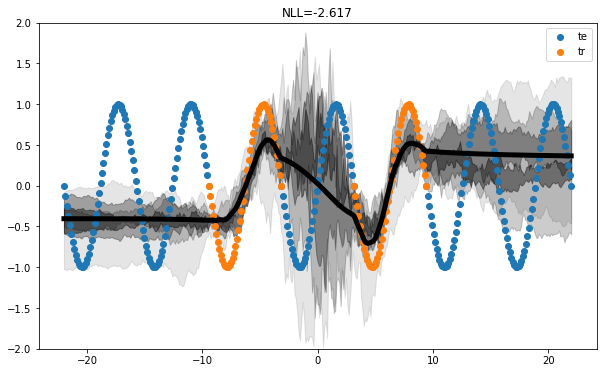

In [28]:
plot()